In [39]:
import pandas as pd
import numpy as np


In [40]:
blackOctavio= pd.read_csv(r'C:/Users/EBUKA/Desktop/jo/GOOGLE.csv')

blackOctavio.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
2510,99.430000,100.000000,96.870003,97.500000,30072800,0,0.0,2022-09-27
2511,97.650002,100.699997,97.110001,100.050003,32466300,0,0.0,2022-09-28
2512,98.639999,98.639999,95.959999,97.419998,31047200,0,0.0,2022-09-29
2513,97.050003,98.900002,95.559998,95.650002,32910100,0,0.0,2022-09-30
2514,96.760002,99.287201,96.521004,98.639999,27744907,0,0.0,2022-10-03


In [41]:
blackOctavios = blackOctavio.set_index(pd.DatetimeIndex(blackOctavio['Date'].values))
blackOctavios.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
2022-09-27,99.430000,100.000000,96.870003,97.500000,30072800,0,0.0,2022-09-27
2022-09-28,97.650002,100.699997,97.110001,100.050003,32466300,0,0.0,2022-09-28
2022-09-29,98.639999,98.639999,95.959999,97.419998,31047200,0,0.0,2022-09-29
2022-09-30,97.050003,98.900002,95.559998,95.650002,32910100,0,0.0,2022-09-30
2022-10-03,96.760002,99.287201,96.521004,98.639999,27744907,0,0.0,2022-10-03


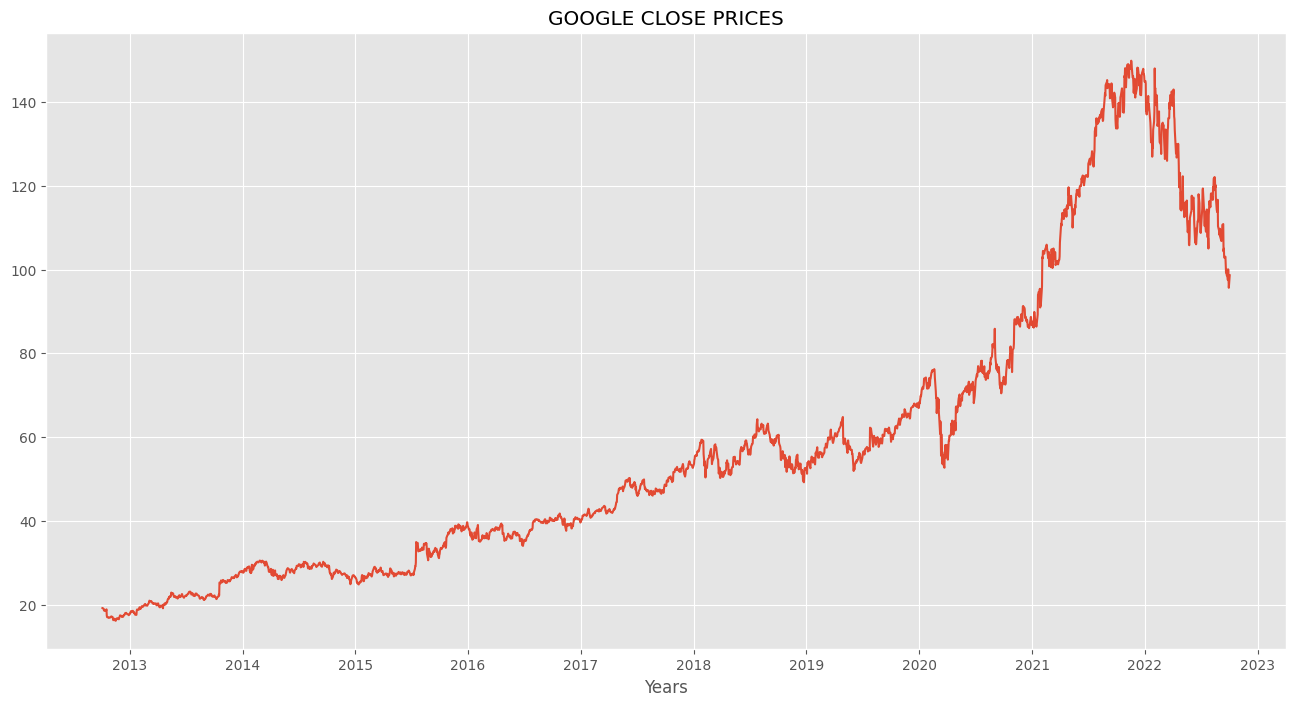

In [42]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt_1=plt.figure(figsize=(16,8))
plt.plot(blackOctavios['Close'])
plt.title('GOOGLE CLOSE PRICES')
plt.xlabel('Years')
plt.savefig('googl.png')

In [43]:
#Calculate and show lump sum value
adj_close=blackOctavios['Close']

#input your initial investment
initial=int(input('Enter your initial lump sum investment amount.'))

print("")

#Get the latest price value in the dataset
latestpriceValue = adj_close[-1]

#get the number of shares bought with the initital investment

num_shares= initial/adj_close

#calculate the returns of the lumpsum investment
lumpsum = latestpriceValue * num_shares
lumpsum


Enter your initial lump sum investment amount. 30000


2012-10-04    153960.850891
2012-10-05    154041.073435
2012-10-08    156035.081198
2012-10-09    158918.454825
2012-10-10    158818.130989
                  ...      
2022-09-27     30350.769043
2022-09-28     29577.210309
2022-09-29     30375.693259
2022-09-30     30937.793356
2022-10-03     30000.000000
Name: Close, Length: 2515, dtype: float64

In [44]:
# show the best days and the worst days for a lump sum investment
print('Lump Sum Investment')
print('The best day to invest a $',str(initial),'lump sum was on', lumpsum.idxmax().strftime('%b %d %Y'),'and would be worth $',str(round(lumpsum.max(),2)),'on', lumpsum.last_valid_index().strftime('%b %d %Y')) 

print('The worst day to invest a $',str(initial),'lump sum was on', lumpsum.idxmin().strftime('%b %d %Y'),'and would be worth $',str(round(lumpsum.min(),2)),'on', lumpsum.last_valid_index().strftime('%b %d %Y')) 


Lump Sum Investment
The best day to invest a $ 30000 lump sum was on Nov 16 2012 and would be worth $ 182715.21 on Oct 03 2022
The worst day to invest a $ 30000 lump sum was on Nov 18 2021 and would be worth $ 19749.26 on Oct 03 2022


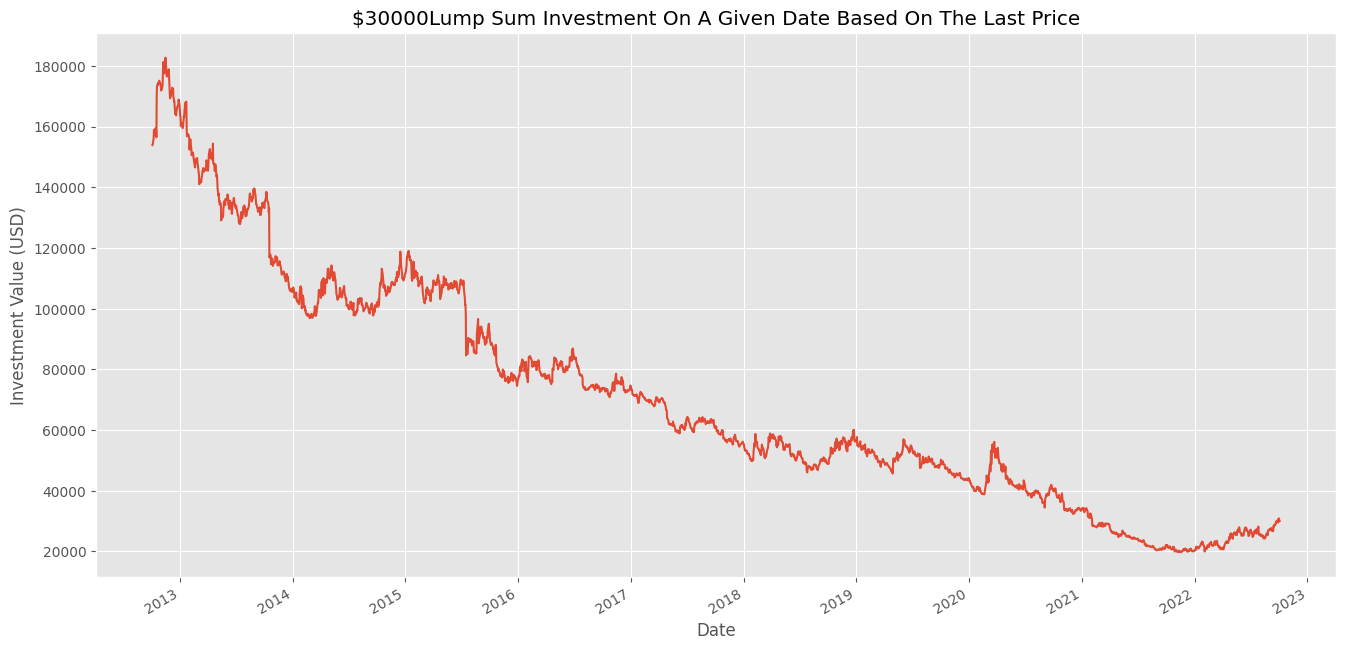

In [45]:
#plot the lumpsum data
lumpsum.plot(figsize=(16,8))
plt.title('$'+str(initial)+ 'Lump Sum Investment On A Given Date Based On The Last Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.savefig('lumpsum.png')

In [46]:
#this chart shows that the earlier you invested, the better returns you can gain on your invested amount

In [47]:
#Dollar Cost Averaging  Strategy

#create a function to calculate the Dollar Cost Averaging Strategy

def DCA(start_date, initial):
    #get the investment periods which will be 12
    investmentPeriod = 12.0
    
    #calculate the amount we plan to invest for each investment date period
    investmentAmount = initial/investmentPeriod
    
    #get the dates of the investment periods
    #For every 25 days, you will be investing a specific amount into the stock
    all_investmentDates = pd.date_range(start_date, periods= investmentPeriod, freq = '25D')
    
    #get the dates up to the last date in the dataset
    investment_dates = all_investmentDates[all_investmentDates < blackOctavios.index[-1]]
    
    #get the indicies that's within the dataset that 
    #are closest to the investment dates
    
    closest_investment_dates = blackOctavios.index.searchsorted(investment_dates)
    

    #get a list of stock prices at the closest investment dates
    stockPrice = blackOctavios['Close'][closest_investment_dates]
    
    #get the total number of shares invested in 
    total_sharesInvested = sum(investmentAmount / stockPrice)
    
    #get the uninvested cash from the initial investment amount
    uninvested_cash = investmentAmount * sum(all_investmentDates >= blackOctavios.index[-1])
    

    #calculate the total
    totaL = uninvested_cash + blackOctavios['Close'][-1]*total_sharesInvested
    return totaL


    

In [48]:
#now execute the DCA(dollar cost averaging function

DCA_List = []
for date in blackOctavios.index:
    DCA_List.append(DCA(date, initial))

In [49]:
#convert the list to a series

#create a new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List

#set date to be the index
dca = dca.set_index(pd.DatetimeIndex(blackOctavios.index))

#convert the dataframe to a series
dca = dca.squeeze()

dca

2012-10-04    151798.272419
2012-10-05    151794.026407
2012-10-08    151572.238419
2012-10-09    151330.259951
2012-10-10    151419.486900
                  ...      
2022-09-27     30029.230754
2022-09-28     29964.767526
2022-09-29     30031.307772
2022-09-30     30078.149446
2022-10-03     30000.000000
Name: DCA, Length: 2515, dtype: float64

In [50]:
#get the best day and worst day for dollar cost investing strategy

# show the best days and the worst days for a lump sum investment
print('Dollar Cost Averaging Investment')
print('The best day to start DCA a $',str(initial),'investment was on', dca.idxmax().strftime('%b %d %Y'),'and would be worth $',str(round(dca.max(),2)),'on', dca.last_valid_index().strftime('%b %d %Y')) 

print('The worst day to start DCA a $',str(initial),'investment was on', dca.idxmin().strftime('%b %d %Y'),'and would be worth $',str(round(dca.min(),2)),'on', dca.last_valid_index().strftime('%b %d %Y')) 




Dollar Cost Averaging Investment
The best day to start DCA a $ 30000 investment was on Oct 19 2012 and would be worth $ 152544.11 on Oct 03 2022
The worst day to start DCA a $ 30000 investment was on Jul 02 2021 and would be worth $ 21312.78 on Oct 03 2022


In [81]:
#in conclusion DCA might not have given you a high returns and a lower returns when compared to the lump sum investment strategy

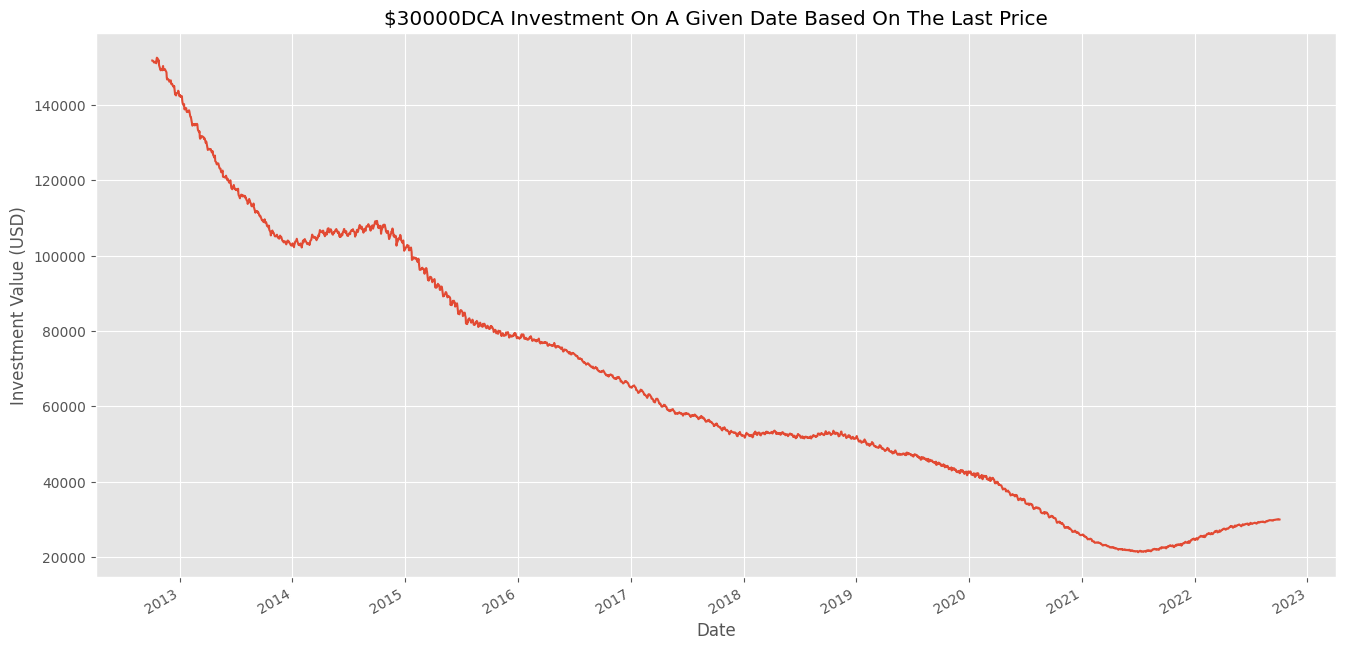

In [51]:
#plot the dca

dca.plot(figsize= (16,8))
plt.title('$'+str(initial)+ 'DCA Investment On A Given Date Based On The Last Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.savefig('DCA visualization.png')

In [52]:
#the chart above shows that dollar cost averaging investment is less volatile than the lump sum investment strategy
#if you can't withstand volatility, then Dollar cost averaging might be a good option


In [53]:
#get the volatility of both lumpsum and dca

lumpsum_volat = lumpsum.pct_change().std()
dca_volat = dca.pct_change().std()

print('Lump sum volatility',str(round(lumpsum_volat*100)),'%')
print('DCA volatility', str(round(dca_volat*100)),'%')

Lump sum volatility 2 %
DCA volatility 1 %


In [54]:
#the volatility shows that lumpsum is more volatile

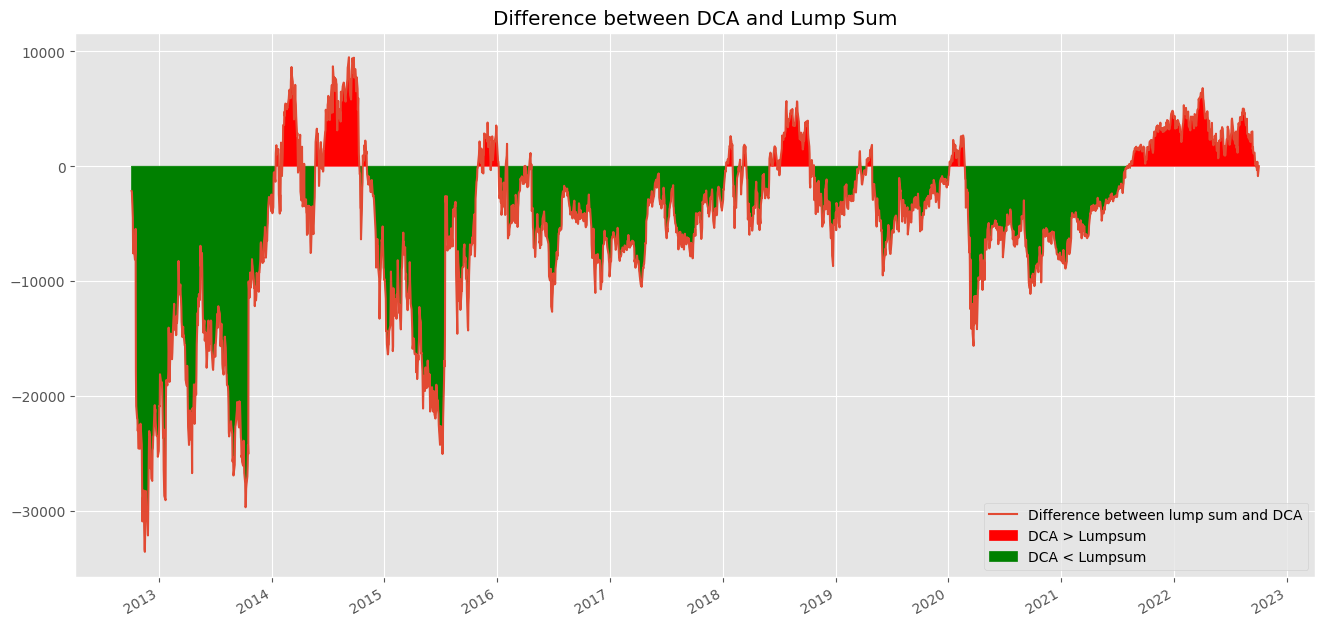

In [55]:
#what strategy is better
diff = dca-lumpsum

#plot the difference
diff.plot(figsize=(16,8), label = 'Difference between lump sum and DCA')
plt.fill_between(diff.index, y1 = diff, y2 = 0, color = 'red', where = diff > 0, label = 'DCA > Lumpsum')
plt.fill_between(diff.index, y1 = diff, y2 = 0, color = 'green', where = diff < 0, label = 'DCA < Lumpsum')

plt.title('Difference between DCA and Lump Sum')
plt.legend()
plt.savefig('Volatility.png')


In [58]:
#claculate the win 
lump_winpct = round(sum(diff<0) / len(diff) * 100, 1)
dca_winpct = round(sum(diff>0) / len(diff) * 100, 1)

print('Lump Sum Investment strategy returned more than DCA', str(lump_winpct),'% of the time invested')

print('Dollar Cost Averaging returned more than Lump Sum', str(dca_winpct),'% of the time invested')


Lump Sum Investment strategy returned more than DCA 74.0 % of the time invested
Dollar Cost Averaging returned more than Lump Sum 26.0 % of the time invested


In [59]:
#from this data cell above, lump sum investment strategy seems to bring in more returns